In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from src.preprocess.functions import get_downstream_counts_object, get_upstream_counts_object

downstream_counts = get_downstream_counts_object()
upstream_counts = get_upstream_counts_object()

In [3]:
len(downstream_counts)

20160

In [4]:
from src.preprocess.functions import get_all_call_counts, get_downstream_probabilities

all_downstream_counts = get_all_call_counts(downstream_counts)
downstream_probs = get_downstream_probabilities(all_downstream_counts)

In [90]:
from src.preprocess.functions import sample_downstream_microservices

sampled_microservices = sample_downstream_microservices(downstream_probs, n=7)
#sampled_microservices = ['MS_4354', 'MS_41700', 'MS_19017', 'MS_62414', 'MS_3351', 'MS_59227', 'MS_2827']

In [91]:
from src.preprocess.functions import get_microservice_workload

workloads_for_sampled_microservices = [
    get_microservice_workload(downstream_counts, sampled_microservice) 
    for sampled_microservice in sampled_microservices
]


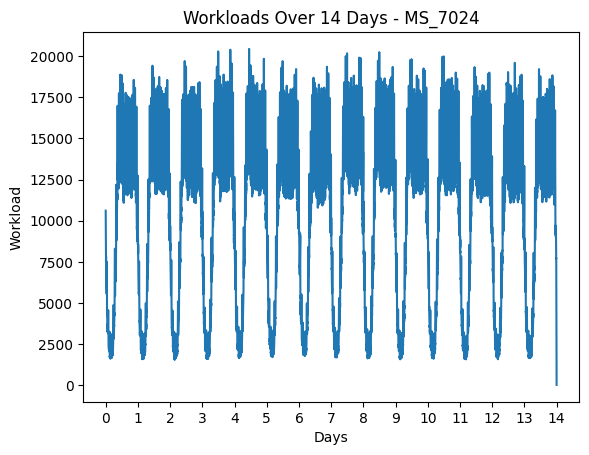

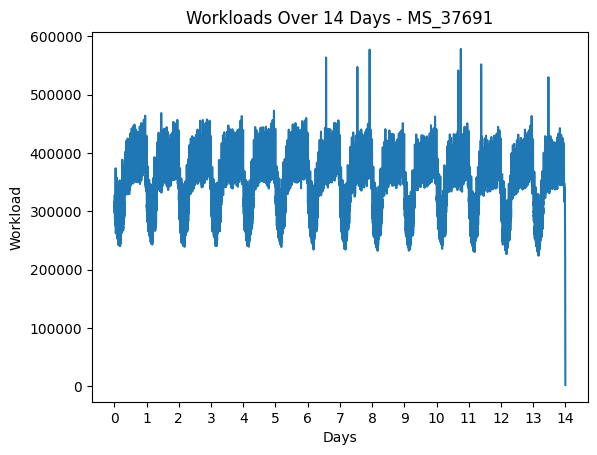

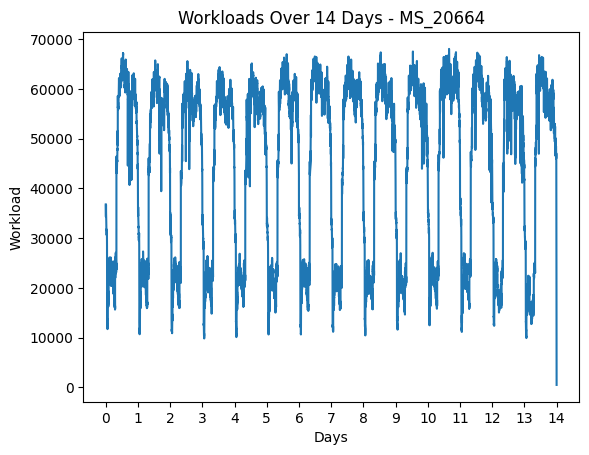

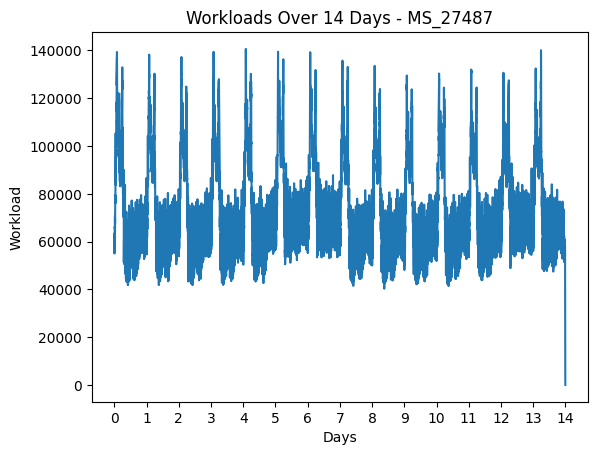

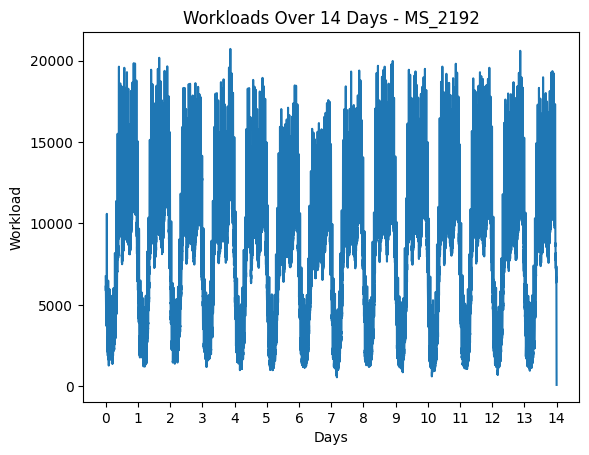

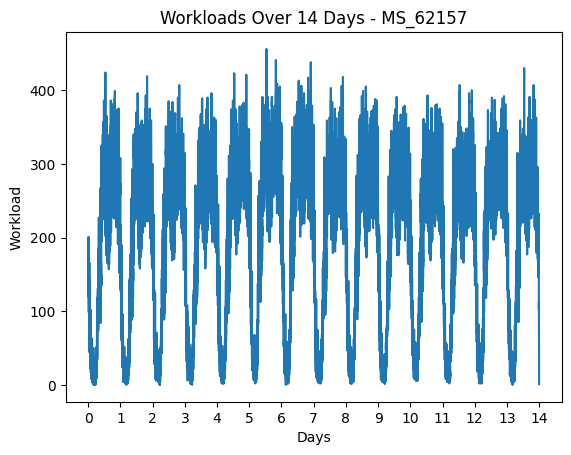

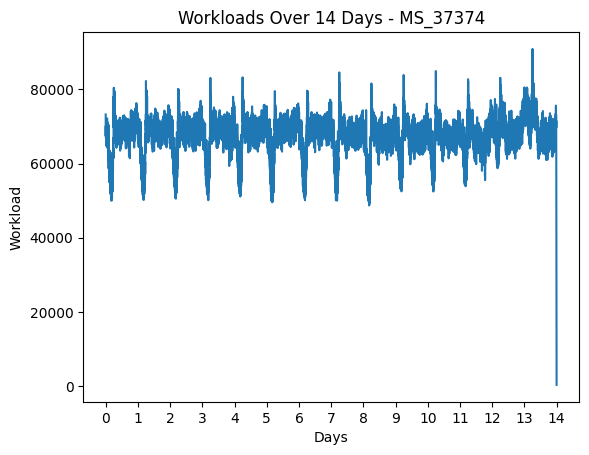

In [92]:
from src.plot import plot_microservice_workload

for i in range(len(workloads_for_sampled_microservices)):
    sampled_microservice = sampled_microservices[i]
    workloads_for_sampled_microservice = workloads_for_sampled_microservices[i]
    plot_microservice_workload(sampled_microservice, workloads_for_sampled_microservice)

In [36]:
import pandas as pd

data_df = pd.read_parquet('/Users/ashfaq/Documents/traces/final_data_files/data_0.parquet')

In [14]:
import pickle

def get_k_neighbor_sets(node, k):
    i_node_set = set()
    u_node_set = set()
    
    def get_nested_k_neighbor_sets(graph, current_node, current_k, node_set):
        if current_k == 0:
            return
        
        node_set.add(current_node)
        
        neighbors = graph.get(current_node, {})
        for neighbor, _ in neighbors.items():
            get_nested_k_neighbor_sets(graph, neighbor, current_k - 1, node_set)
    
    with open('/Volumes/EXTERNALHDD/traces/data_stats_aggregated/downstream_graph.pickle', 'rb') as file:
        downstream_graph = pickle.load(file)
    
    with open('/Volumes/EXTERNALHDD/traces/data_stats_aggregated/upstream_graph.pickle', 'rb') as file:
        upstream_graph = pickle.load(file)
        
    get_nested_k_neighbor_sets(downstream_graph, node, k, i_node_set)
    get_nested_k_neighbor_sets(upstream_graph, node, k, u_node_set)
    return i_node_set, u_node_set

In [93]:
from src.preprocess.functions import get_node_label_encoder

label_encoder = get_node_label_encoder()
labels = label_encoder.transform(['MS_4354', 'MS_41700', 'MS_19017', 'MS_62414', 'MS_3351', 'MS_59227', 'MS_2827', 'MS_20664'])

In [94]:
labels

array([34106, 32235,  9383, 53163, 23998, 49954, 18737, 11021])

In [18]:
i_set_1, u_set_1 = get_k_neighbor_sets(34106, 3)

In [19]:
len(i_set_1), len(u_set_1), len(i_set_1 | u_set_1)

(10511, 15830, 18674)

In [20]:
i_set_2, u_set_2 = get_k_neighbor_sets(32235, 3)

In [21]:
len(i_set_2), len(u_set_2), len(i_set_2 | u_set_2)

(2225, 2, 2225)

In [22]:
i_set_3, u_set_3 = get_k_neighbor_sets(9383, 3)

In [23]:
len(i_set_3), len(u_set_3), len(i_set_3 | u_set_3)

(547, 2, 547)

In [24]:
i_set_4, u_set_4 = get_k_neighbor_sets(53163, 3)

In [25]:
len(i_set_4), len(u_set_4), len(i_set_4 | u_set_4)

(1747, 2, 1747)

In [26]:
i_set_5, u_set_5 = get_k_neighbor_sets(23998, 3)

In [27]:
len(i_set_5), len(u_set_5), len(i_set_5 | u_set_5)

(78, 2, 78)

In [28]:
i_set_6, u_set_6 = get_k_neighbor_sets(49954, 3)

In [29]:
len(i_set_6), len(u_set_6), len(i_set_6 | u_set_6)

(4436, 13379, 14128)

In [30]:
i_set_7, u_set_7 = get_k_neighbor_sets(18737, 3)

In [31]:
len(i_set_7), len(u_set_7), len(i_set_7 | u_set_7)

(14617, 13792, 19889)

In [95]:
i_set_8, u_set_8 = get_k_neighbor_sets(11021, 3)

In [96]:
len(i_set_8), len(u_set_8)

(1043, 2062)

In [97]:
total_set = i_set_2 | i_set_3 | i_set_4 | i_set_8 | u_set_2 | u_set_3 | u_set_4 | u_set_8

In [98]:
len(total_set)

5169

In [101]:
import pandas as pd

pd.read_parquet('/Volumes/EXTERNALHDD/traces/filtered_data_files/data_0.parquet')

,u,i,ts,idx,rt,0,1,2,3,4
5,38968,12084,0,6,8.0,0.0,0.0,0.0,0.0,1.0
6,38968,45110,0,7,2.0,0.0,0.0,0.0,0.0,1.0
13,6275,6275,0,14,11.0,0.0,0.0,0.0,0.0,0.0
14,17683,6275,0,15,11.0,0.0,0.0,0.0,0.0,1.0
15,67000,23998,0,16,18.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3797489,67000,31912,59999,3797490,6.0,0.0,1.0,0.0,0.0,0.0
3797490,27742,6275,59999,3797491,2.0,0.0,0.0,0.0,0.0,1.0
3797492,67000,23998,59999,3797493,65.0,0.0,1.0,0.0,0.0,0.0
3797493,6275,6275,59999,3797494,2.0,0.0,0.0,0.0,0.0,0.0
